# Introduction to Tesseract

In [1]:
from PIL import Image
import pytesseract
import numpy as np

## Extract all text from an image

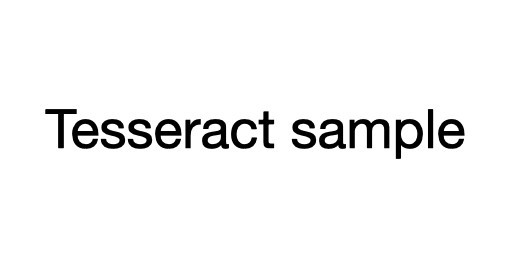

In [2]:
# Load a test image
im = Image.open("./images/Tesseract sample.jpeg")
im.show()

In [3]:
# Extract the text from the image
text = pytesseract.image_to_string(im)
print(text)

Tesseract sample



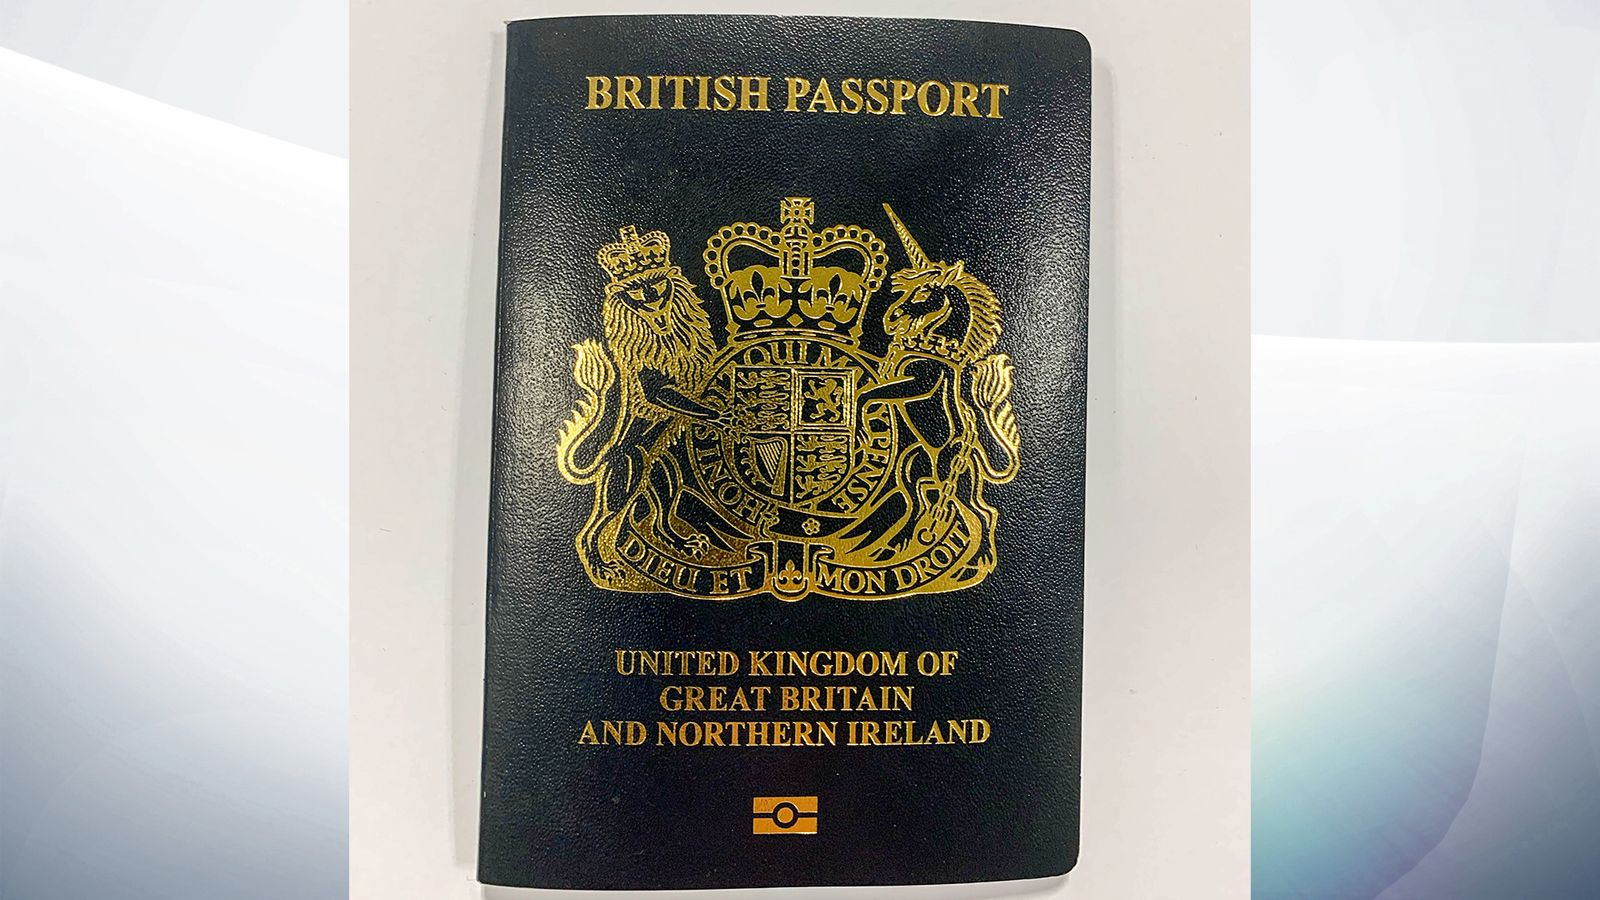

In [4]:
im = Image.open("./images/New UK passport.jpg")
im.show()

In [5]:
text = pytesseract.image_to_string(im)
print(text)

Dee ones

GREAT BRITAIN
AND NORTHERN IRELAND

 



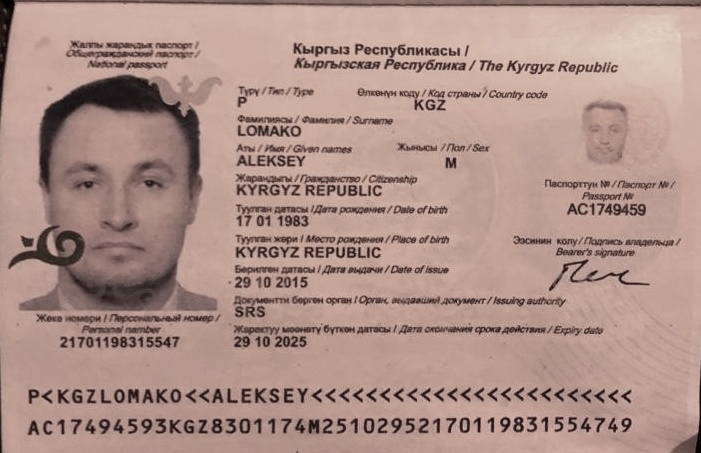

In [6]:
im = Image.open("./images/kyrgiz.jpg")
im.show()

In [7]:
text = pytesseract.image_to_string(im)
print(text)

 
    

Kuiprets Peeny6nuxact/
Keipreiscxan Pecny6nnxa / The Kyrgyz Republic

Iyer? Tipe Orme saya rps Conny code
. GZ

 

comnmcn c=
/ Cannon /Survame
LOMAKO
rw / ten Gvon names Kasson /Ton/Ser
ALEKSEY M
Xaomenan [paramere / Cazensni
KYRGYZ REPUBLIC Macey W/m
are
a rom re AC1749459
“Type xepa | Macro paneer /Puace of ort) ‘act sany/ oars anagem /
senate REPUBLIC Bears sponse
rac / lea sa / Date of sue
Biow5
oR sesnanslsonpuant subg witty
‘one nouapet | Pepeomaraceal reat /
sscory yim ca! Jara ort cpoce aed / Ex dts
21701198315547 2910 2028

P< KGZLOMAKO<<ALEKSEY <<<<<<<<<<<<<<<<<<£<<<<<<
AC17494593KGZ8301174M25102952170119831554749



### Handwritten

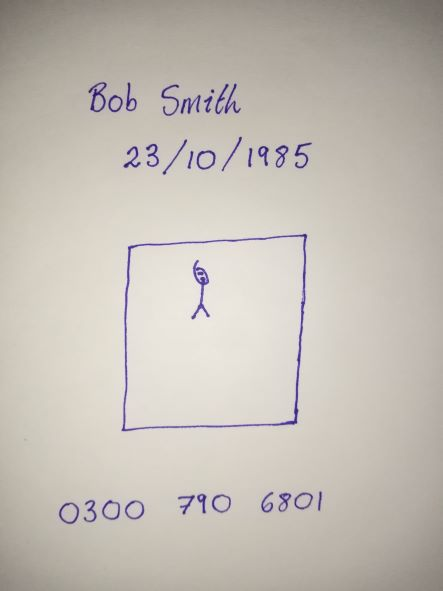

In [8]:
im = Image.open("./images/Bob Smith.jpg")
im.show()

In [9]:
text = pytesseract.image_to_string(im)
print(text)

23/10/1985

6300 710 67cm

 



OCR has struggled to detect most of the handwritten text in the image, so some image processing will be tried.

In [10]:
from pytesseract import Output
import pytesseract
import cv2
import numpy as np

from PIL import Image
import pytesseract
import numpy as np

import matplotlib.pyplot as plt

In [11]:
filename = "./images/Bob Smith.jpg"
raw = np.array(Image.open(filename))
text = pytesseract.image_to_string(raw)
print(text)

23/10/1985

0300 710 6x0!

 



Reading the image differently has resulted in different text being extracted.

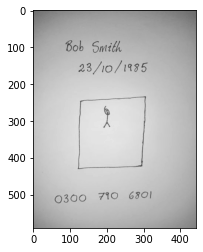

In [12]:
gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

In [13]:
norm_im = np.zeros((raw.shape[0], raw.shape[1]))
img = cv2.normalize(gray, norm_im, 0, 255, cv2.NORM_MINMAX)

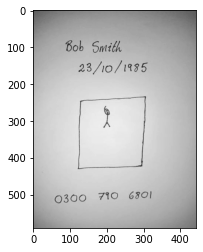

In [14]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [15]:
print(pytesseract.image_to_string(img))

23/10/1185

(0300 710 6801

 



Is the extraction issue due to size?

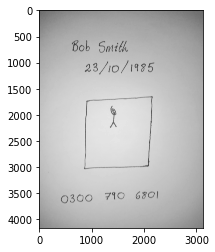

In [16]:
filename = "./images/Bob Smith - large.jpg"
raw = np.array(Image.open(filename))
gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

In [17]:
text = pytesseract.image_to_string(gray)
print(text)

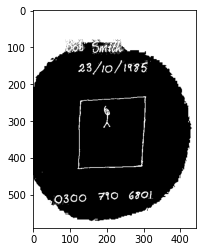

In [18]:
# Read the (small) image
filename = "./images/Bob Smith.jpg"
raw = np.array(Image.open(filename))

# Convert to grayscale
gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.show()

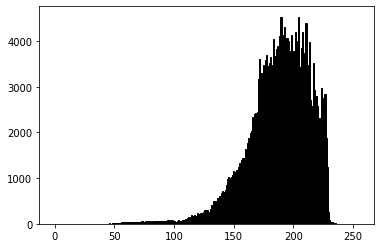

In [19]:
plt.hist(gray.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')
plt.show()

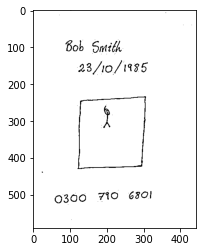

In [20]:
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                            cv2.THRESH_BINARY,21,5)
plt.imshow(th3, cmap='gray', vmin=0, vmax=255)
plt.show()

In [21]:
text = pytesseract.image_to_string(th3)
print(text)

Bob Smith
28/10/1185

0300 FIO 6701



In [22]:
results = pytesseract.image_to_data(th3, output_type=Output.DICT)

In [23]:
results

{'level': [1, 2, 3, 4, 5, 5, 4, 5, 2, 3, 4, 5, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 3],
 'left': [0, 88, 88, 88, 88, 161, 123, 123, 59, 59, 59, 59, 177, 261],
 'top': [0, 82, 82, 82, 82, 83, 136, 136, 491, 491, 491, 500, 493, 491],
 'width': [443, 224, 224, 153, 49, 80, 189, 189, 263, 263, 263, 85, 54, 61],
 'height': [591, 94, 94, 34, 30, 33, 40, 40, 33, 33, 33, 24, 22, 22],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  94,
  70,
  '-1',
  49,
  '-1',
  '-1',
  '-1',
  88,
  39,
  28],
 'text': ['',
  '',
  '',
  '',
  'Bob',
  'Smith',
  '',
  '28/10/1185',
  '',
  '',
  '',
  '0300',
  'FIO',
  '6701']}

In [24]:
image = th3[:]

In [25]:
for i in range(0, len(results["text"])):
    x = results["left"][i]
    y = results["top"][i]
    
    w = results["width"][i]
    h = results["height"][i]
    text = results["text"][i]
    conf = int(results["conf"][i])
    if conf > 0:
        text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)

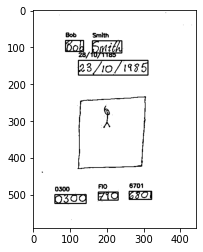

In [26]:
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

## Extracing two sets of text on a page

Suppose an image contains the details of two nominals and the details are distributed on the left and right hand sides of the page. An algorithm is required to separate the details for the two nominals. The assumptions that will be used are:

* The details are on the left and right side of the page
* The details don't overlap

In [27]:
from sklearn.cluster import KMeans
import random

In [28]:
def cluster(x_positions, n=2):
    """Cluster the x-positions into n groups."""
    
    # Preconditions
    assert type(x_positions) == list, f"Expected a list, got {type(x_positions)}"
    assert type(n) == int, f"Number of clusters must be an integer"
    assert n >= 1, f"Number of clusters must be >= 1"
    
    X = np.array(x_positions)
    X = X.reshape(-1, 1)
    
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
    
    classes = list(kmeans.labels_)
    
    # Find the mean x position of each class
    total_x_position = np.zeros(n)
    n_x_positions = np.zeros(n)
    for idx in range(len(classes)):
        n_x_positions[classes[idx]] += 1
        total_x_position[classes[idx]] += x_positions[idx]
    
    if not np.all(n_x_positions > 0):
        return None
    
    mean_x_position = total_x_position / n_x_positions

    # Find the mapping from the old class index to the sorted class index
    mapping = {}
    for idx, sorted_idx in enumerate(np.argsort(mean_x_position)):
        mapping[idx] = sorted_idx
    
    # Perform the mapping
    sorted_classes = []
    for c in classes:
        sorted_classes.append(mapping[c])
        
    return sorted_classes

In [29]:
# Example of performing clustering
max_x = 443
centres = [100, 300]
cluster_width = 100

mean_number_points_per_cluster = 5

def generate_points_for_cluster(centre, width, lam):
    """Generate points for a single cluster."""
    
    # Number of points to generate
    n = np.random.poisson(lam)
    
    low = centre - int(width/2)
    high = centre + int(width/2)
    
    # Generate the points
    return [random.randint(low, high) for _ in range(n)]

p0 = generate_points_for_cluster(centres[0], cluster_width, mean_number_points_per_cluster)
p1 = generate_points_for_cluster(centres[1], cluster_width, mean_number_points_per_cluster)
positions = p0[:]
positions.extend(p1)

actual_cluster = [0 for _ in range(len(positions))]
actual_cluster[(len(p0)):] = [1 for _ in range(len(p1))]

In [30]:
cluster(positions)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

In [31]:
actual_cluster

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

### Test case

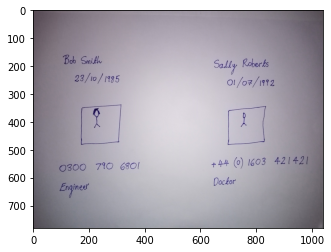

In [32]:
# Read the (small) image
filename = "./images/Two nominals.png"
raw = np.array(Image.open(filename))

plt.imshow(raw, cmap='gray', vmin=0, vmax=255)
plt.show()

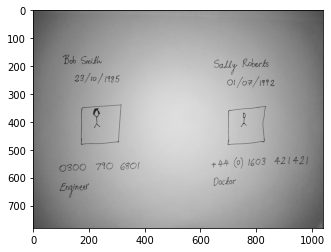

In [33]:
# Convert to grayscale
gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

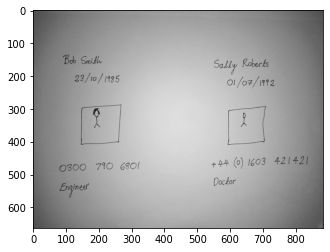

In [34]:
# Percentage of original size
scale_percent = 85
width = int(gray.shape[1] * scale_percent / 100)
height = int(gray.shape[0] * scale_percent / 100)
dim = (width, height)
  
# Resize the image
resized = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)

plt.imshow(resized, cmap='gray', vmin=0, vmax=255)
plt.show()

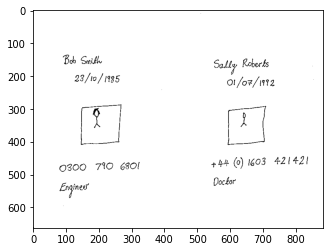

In [35]:
# Use adaptive thresholding
thresholded = cv2.adaptiveThreshold(resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 17, 11)
plt.imshow(thresholded, cmap='gray', vmin=0, vmax=255)
plt.show()

In [36]:
results = pytesseract.image_to_data(thresholded, output_type=Output.DICT)

In [37]:
image = thresholded[:]

for i in range(0, len(results["text"])):
    x = results["left"][i]
    y = results["top"][i]
    
    w = results["width"][i]
    h = results["height"][i]
    text = results["text"][i]
    conf = int(results["conf"][i])
    if conf > 0:
        text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)

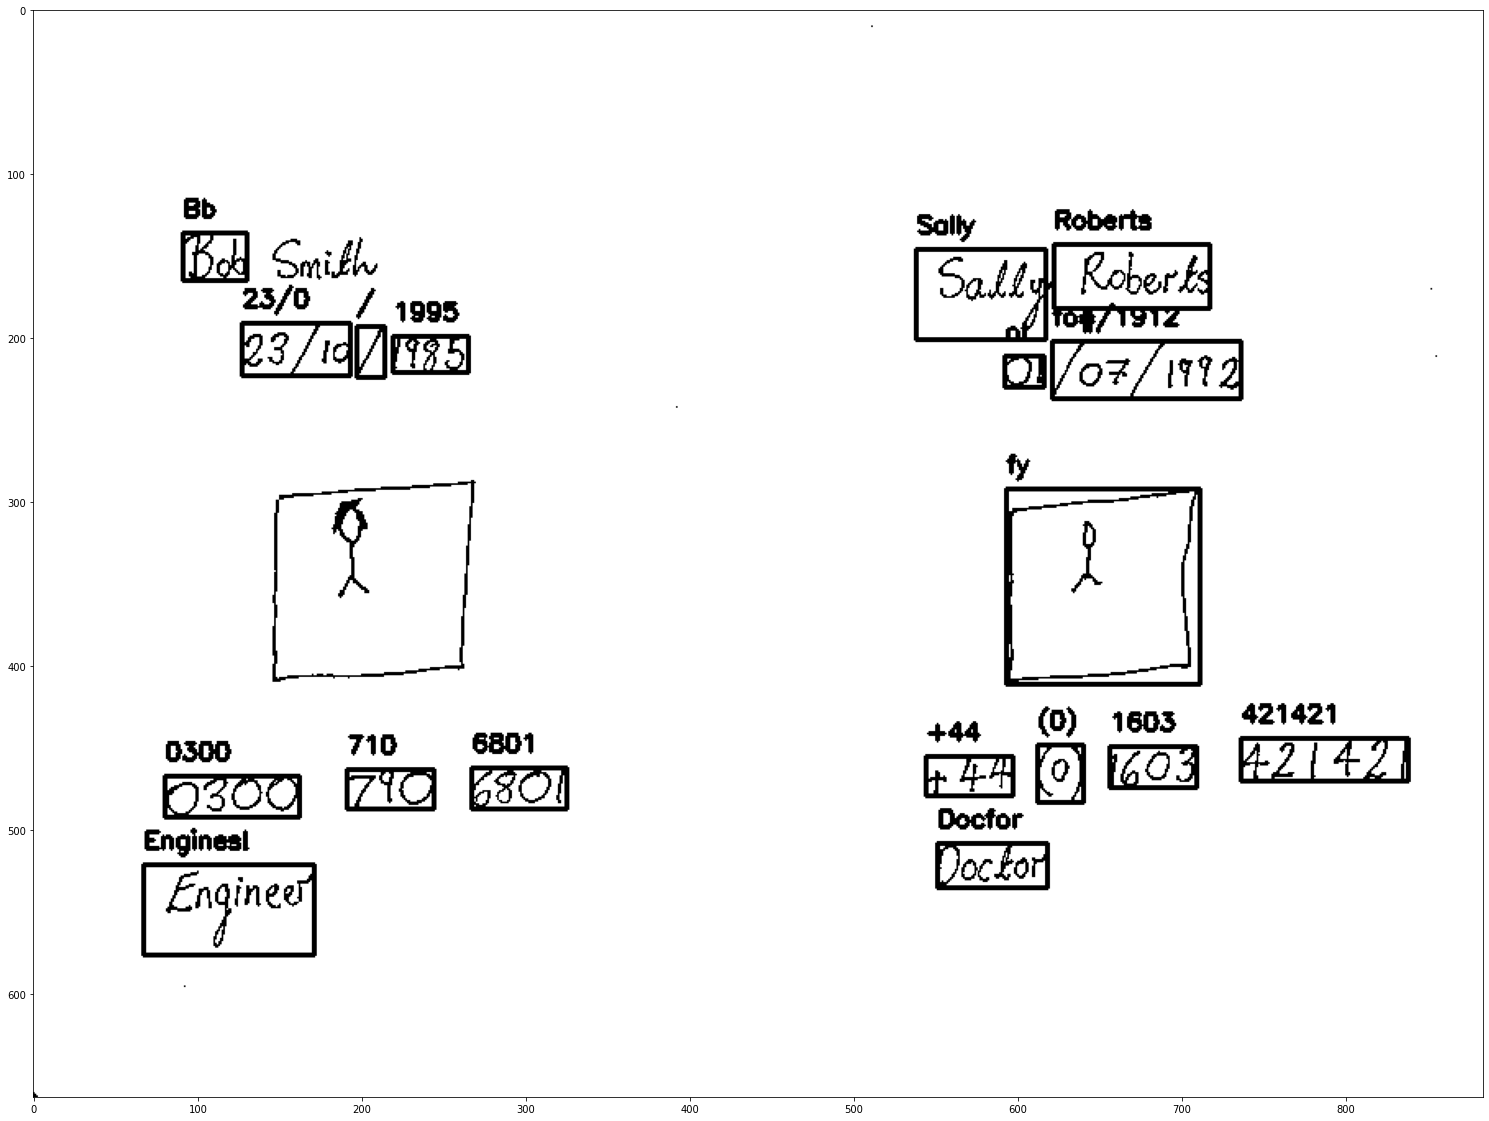

In [38]:
plt.figure(figsize = (30, 20))
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

In [39]:
def calculate_central_positions(results):
    
    # Preconditions
    assert type(results) == dict, f"Expected a dict, got {type(results)}"
    
    return list(np.array(results['left']) + np.array(results['width'])/2)

In [40]:
central_x_positions = calculate_central_positions(results)
cluster_assignment = cluster(central_x_positions)

In [41]:
def extract_text_for_cluster(results, cluster_assignment, cluster_id, min_confidence):
    
    assert type(results) == dict
    assert cluster_id in cluster_assignment
    
    text = []
    
    for idx in range(len(cluster_assignment)):
        if cluster_assignment[idx] == cluster_id and int(results['conf'][idx]) > min_confidence:
            text.append(results['text'][idx])
    
    return text

In [42]:
for cluster_id in [0, 1]:
    t = extract_text_for_cluster(results, cluster_assignment, cluster_id=cluster_id, min_confidence=0)
    print(t)

['Bb', '23/0', '/', '1995', '0300', '710', '6801', 'Engines!']
['Sally', 'Roberts', 'ot', 'fo#/1912', 'fy', '+44', '(0)', '1603', '421421', 'Docfor']


In [43]:
# # Try different config options
# for psm in range(0, 14):
#     custom_oem_psm_config = f'--oem 3 --psm {psm}'
#     print(custom_oem_psm_config)
#     try:
#         t = pytesseract.image_to_string(thresholded, config=custom_oem_psm_config)
#         print(f"{psm} -- {t}")
#     except:
#         pass

## Tuning

In [44]:
def calculate_distance(v1, v2):
    """Distance between two lists of tokens."""
    
    common = set(v1).intersection(set(v2))
    max_length = max(len(v1), len(v2))
    return 1.0 * len(common) / max_length

# Tests
assert calculate_distance(["a", "b"], ["b"]) == 0.5
assert calculate_distance(["a", "b"], ["b", "c"]) == 0.5
assert calculate_distance(["a", "b"], ["b", "a"]) == 1.0

In [45]:
def average_distance(expected, actual):
    
    # Preconditions
    assert type(expected) == list
    assert type(actual) == list
    assert len(expected) == len(actual)
    
    distances = [calculate_distance(expected[idx], actual[idx]) for idx in range(len(expected))]
    
    return sum(distances) / len(distances)

# Tests
assert average_distance([["a", "b"]],[["a"]]) == 0.5
assert average_distance([["a", "b"]],[["a", "b"]]) == 1.0
assert average_distance([["a"], ["c"]], [["b"], ["c"]]) == 0.5

In [46]:
def calculate_error(gray_image, scale_percent, block_size, c, expected_tokens):
    
    # Resize the image
    width = int(gray_image.shape[1] * scale_percent / 100)
    height = int(gray_image.shape[0] * scale_percent / 100)
    dim = (width, height)

    # Resize the image
    resized = cv2.resize(gray_image, dim, interpolation = cv2.INTER_AREA)
    
    # Use adaptive thresholding
    thresholded = cv2.adaptiveThreshold(resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, c)

    # Perform OCR
    results = pytesseract.image_to_data(thresholded, output_type=Output.DICT)
    
    # Perform clustering to find left and right parts
    central_x_positions = calculate_central_positions(results)
    cluster_assignment = cluster(central_x_positions)
    
    if cluster_assignment is None:
        return None, None
    
    # Extract the text for each cluster
    tokens_for_cluster = []
    for cluster_id in [0, 1]:
        t = extract_text_for_cluster(results, cluster_assignment, cluster_id=cluster_id, min_confidence=0)
        tokens_for_cluster.append(t)
    
    # Calculate the error
    return average_distance(expected_tokens, tokens_for_cluster), tokens_for_cluster

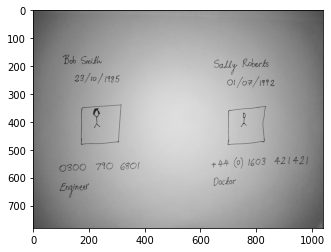

In [47]:
# Read the test image
filename = "./images/Two nominals.png"
raw = np.array(Image.open(filename))

# Convert to grayscale
gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

In [48]:
expected_tokens = [
    ["Bob", "Smith", "23/10/1985", "0300", "790", "6801", "Engineer"],
    ["Sally", "Roberts", "01/07/1992", "+44", "(0)", "421421"]
]
calculate_error(gray, scale_percent=85, block_size=17, c=11, expected_tokens=expected_tokens)

(0.375,
 [['Bb', '23/0', '/', '1995', '0300', '710', '6801', 'Engines!'],
  ['Sally',
   'Roberts',
   'ot',
   'fo#/1912',
   'fy',
   '+44',
   '(0)',
   '1603',
   '421421',
   'Docfor']])

In [49]:
best_overlap = 0
best_scale_percent = None
best_block_size = None
best_c = None
best_actual_tokens = None

for scale_percent in np.arange(40, 100, 2):
    print(f"Scale percent: {scale_percent}")
    for block_size in np.arange(5, 21, 2):
        for c in [1, 2, 3, 4, 5, 10]:
    
            try:
                overlap, actual_tokens = calculate_error(gray, scale_percent, block_size=block_size, 
                                                         c=c, expected_tokens=expected_tokens)

                if overlap is None:
                    continue
                
                if overlap > best_overlap:
                    best_overlap = overlap
                    best_scale_percent = scale_percent
                    best_block_size = block_size
                    best_c = c
                    best_actual_tokens = actual_tokens
            except:
                pass

Scale percent: 40


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 42


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 44


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 46


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 48


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 50


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 52


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 54


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 56


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 58


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 60


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 62


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 64


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)


Scale percent: 66


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 68


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 70


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 72


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)


Scale percent: 74


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 76


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 78


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 80


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 82


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 84


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)


Scale percent: 86


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 88


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 90


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 92


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 94


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 96


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

Scale percent: 98


/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
/tmp/ipykernel_4435/2383694493.py:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2).

In [50]:
print(f"Best overlap = {best_overlap}")
print(f"with parameters: scale_percent = {best_scale_percent}, block_size = {best_block_size}, c = {best_c}")
best_actual_tokens

Best overlap = 0.4722222222222222
with parameters: scale_percent = 60, block_size = 17, c = 4


[['Bob', 'Suithe', '23/10/1985', ' ', '0300', '710', '68ol', 'Engineer'],
 ['Salty', 'Roberts', '01', 'ZI', '+44', '(0)', '1603', '421421', 'Docéor']]